### Support Vector Machine Model
- Linear classifier
- It is used to find the hyperplane which best divides the dataset into two classes
- Hyperplane is a line which linearly seperates the classes

**Maximum Width**
- w * x - b = +1
- w * x - b = 0
- w * x - b = -1

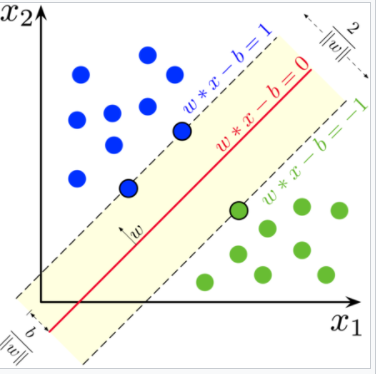

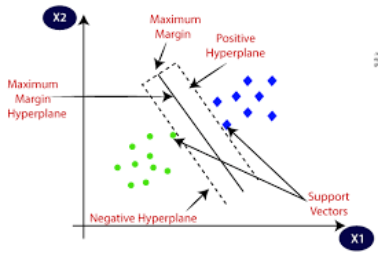

In [48]:
import numpy as np
import pandas as pd

In [49]:
df = pd.read_csv('https://raw.githubusercontent.com/nagamounika5/Datasets/master/lung_cancer_examples.csv')
df.head(2)

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1


In [50]:
df.isnull().sum()

Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64

In [51]:
df.shape

(59, 7)

In [52]:
X1 = df[['Age','Smokes','AreaQ','Alkhol']]
Y1 = df['Result']

In [53]:
from sklearn.svm import SVC

In [54]:
sv1 = SVC(kernel='linear')

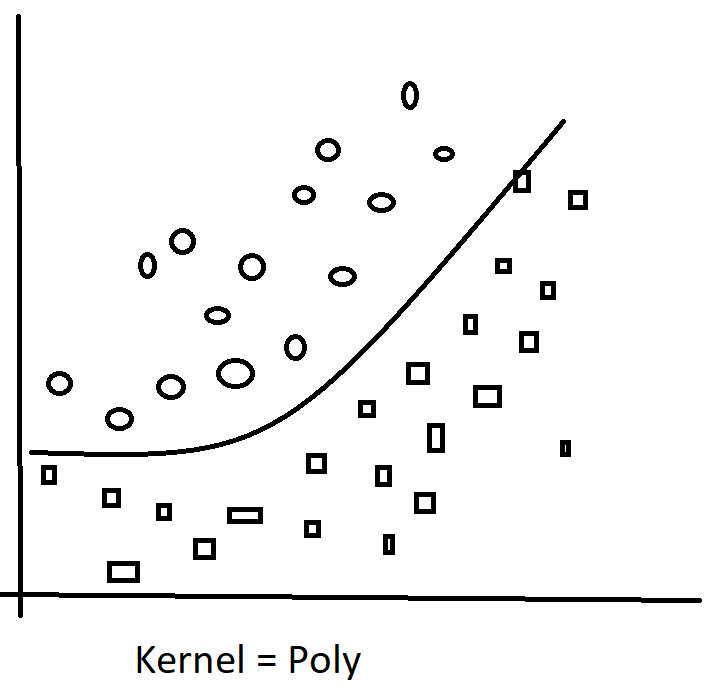

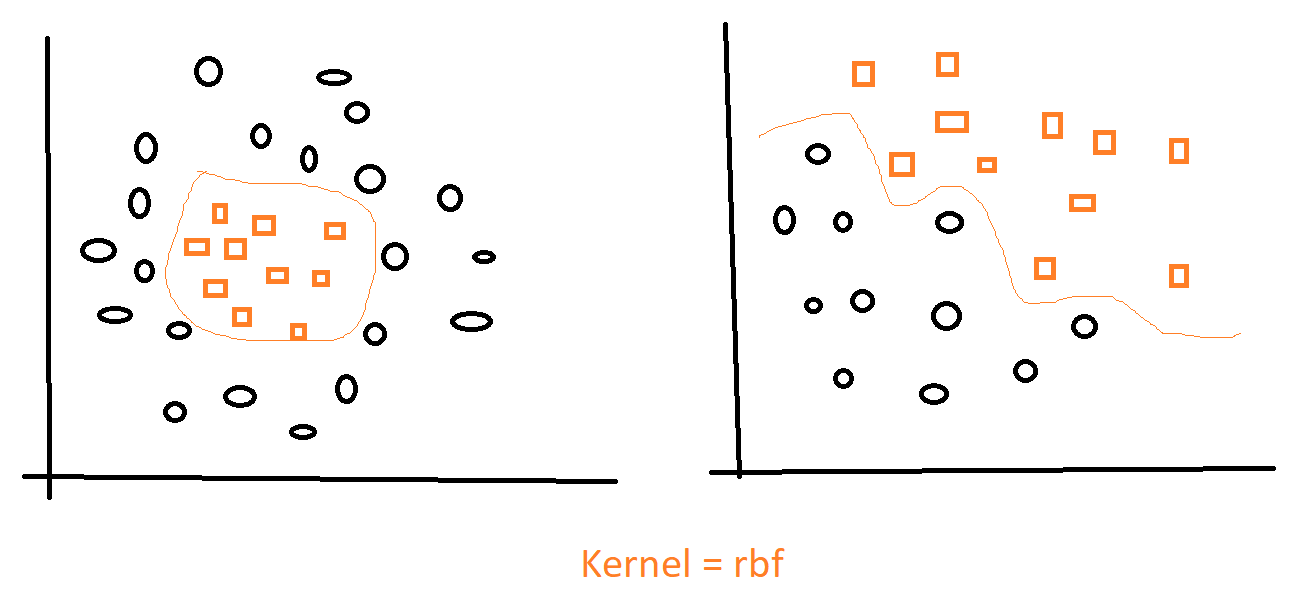

- rbf: Radial Base Function

In [55]:
sv1.fit(X1, Y1)

SVC(kernel='linear')

In [56]:
y_predict1 = sv1.predict(X1)
y_predict1

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [58]:
confusion_matrix(Y1, y_predict1)

array([[31,  0],
       [ 0, 28]], dtype=int64)

In [59]:
accuracy_score(Y1, y_predict1)

1.0

#### Take titanic dataset
- Manipulate the dataset
- Apply SVC model
- Change different kernels in SVC and check accuracy

In [84]:
df2 = pd.read_csv('https://raw.githubusercontent.com/nagamounika5/Datasets/master/titanic.csv')
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
df2.shape

(891, 12)

In [62]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [63]:
df2['Age'].value_counts()

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: Age, Length: 88, dtype: int64

In [64]:
len(df2['Age'].value_counts())

88

In [65]:
df2['Age'].value_counts().index

Float64Index([24.0, 22.0, 18.0, 28.0, 19.0, 30.0, 21.0, 25.0, 36.0, 29.0, 35.0,
              32.0, 27.0, 26.0, 16.0, 31.0, 33.0, 34.0, 23.0, 20.0, 39.0, 42.0,
              40.0, 17.0, 45.0, 38.0,  4.0,  2.0, 50.0, 47.0, 48.0, 44.0,  9.0,
              54.0, 51.0,  1.0, 14.0,  3.0, 41.0, 37.0, 52.0, 49.0, 15.0, 43.0,
              58.0,  8.0, 60.0, 11.0, 56.0,  5.0, 62.0, 65.0,  7.0, 61.0, 46.0,
               6.0, 40.5, 10.0, 0.75, 30.5, 64.0, 32.5, 0.83, 59.0, 70.0, 63.0,
              28.5, 71.0, 13.0, 57.0, 55.0, 45.5, 24.5, 66.0, 20.5, 0.67, 80.0,
              14.5, 34.5, 23.5, 53.0, 36.5, 0.42, 55.5, 74.0, 0.92, 70.5,
              12.0],
             dtype='float64')

In [66]:
a = df2['Age'].value_counts().index[0:10]
a

Float64Index([24.0, 22.0, 18.0, 28.0, 19.0, 30.0, 21.0, 25.0, 36.0, 29.0], dtype='float64')

In [67]:
import seaborn as sns

<AxesSubplot:ylabel='Survived'>

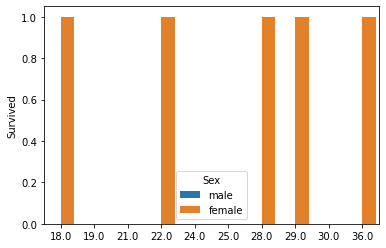

In [68]:
sns.barplot(x = a, y = df2['Survived'][0:10], data = df2, hue = df2['Sex'][0:10])

In [69]:
df_age = df2[(df2['Age'] >= 1) & (df2['Age'] <= 18)]
df_age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


<AxesSubplot:xlabel='Age', ylabel='Survived'>

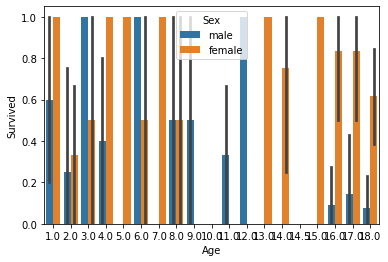

In [70]:
sns.barplot(data = df_age, x = 'Age', y='Survived', hue = df_age['Sex'])

In [72]:
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [85]:
df2['Age'] = df2['Age'].fillna(df2['Age'].mean())

In [86]:
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [87]:
df2['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [88]:
df2['Embarked'] = df2['Embarked'].fillna('Q')

In [89]:
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [90]:
df2.drop(['Cabin'],axis=1,inplace = True)
df2.drop(['PassengerId'],axis=1,inplace = True)
df2.drop(['Name'],axis=1,inplace = True)
df2.drop(['Ticket'],axis=1,inplace = True)

In [91]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [92]:
from sklearn.preprocessing import LabelEncoder

In [93]:
le = LabelEncoder()

In [94]:
df2['Sex'] = le.fit_transform(df2['Sex'])
df2['Embarked'] = le.fit_transform(df2['Embarked'])

In [95]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [96]:
X = df2.drop(['Survived'], axis=1)
Y = df2['Survived']

In [97]:
from sklearn.model_selection import train_test_split

In [103]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=55)

In [104]:
from sklearn.svm import SVC

In [105]:
sv1 = SVC(kernel='linear')

In [106]:
sv1.fit(x_train,y_train)

SVC(kernel='linear')

In [108]:
y_pred1 = sv1.predict(x_test)

In [109]:
accuracy_score(y_test, y_pred1)

0.7533632286995515

In [110]:
sv2 = SVC(kernel='poly')

In [111]:
sv2.fit(x_train,y_train)

SVC(kernel='poly')

In [112]:
y_pred2 = sv2.predict(x_test)

In [113]:
accuracy_score(y_test, y_pred2)

0.6278026905829597

### Decision Tree
- Decision tree is the most powerful and popular tool for classification and prediction
- A decision tree is a very specific type of probability tree that enables you to make a decision about some kind of process.
- A Decision tree is a flowchart like tree structure
- Used in data mining for deriving a strategy to reach a particular goal, its also widely used in machine learning
- Classification and Regression algorithm
- Types of Algorithms
    1. Gini Index / Gini Impurity
    2. Information Gain
    
1. Gini Index
    - Gini means impurity. 
    - If Gini is less, you will get pure data. If Gini is more, then you will imbalanced data.
    - Calculates the amount of probability of a specific feature that is classified incorrectly when selected randomly
    - **Formula: To find impurities in data** 
        - GI  =   1   -   (  P(X1)^2  +  P(X2)^2  + ....... + P(Xn)^2  )
       
2. Information Gain
    - IG is used to calculate and resuction of entropy
    - Entropy is again impurity of data.
    - **Formula: To calculate Entropy**
        - Entropy = - ( P(0) * log(P(0) )  +  ( P(1) * log(P(1) ) )

#### Important Terminology related to Decision Trees
- **Root Node:** It represents the entire sample and this further gets divided into two or more homogeneous sets.
- **Splitting:** It is a process of dividing a node into two or more sub-nodes.

- **Decision Node:** When a sub-node splits into further sub-nodes, then it is called the decision node.

- **Leaf / Terminal Node:** Nodes do not split is called Leaf or Terminal node.

- **Pruning:** When we remove sub-nodes of a decision node, this process is called pruning. You can say the opposite process of splitting.

- **Branch / Sub-Tree:** A subsection of the entire tree is called branch or sub-tree.

- **Parent and Child Node:** A node, which is divided into sub-nodes is called a parent node of sub-nodes whereas sub-nodes are the child of a parent node.

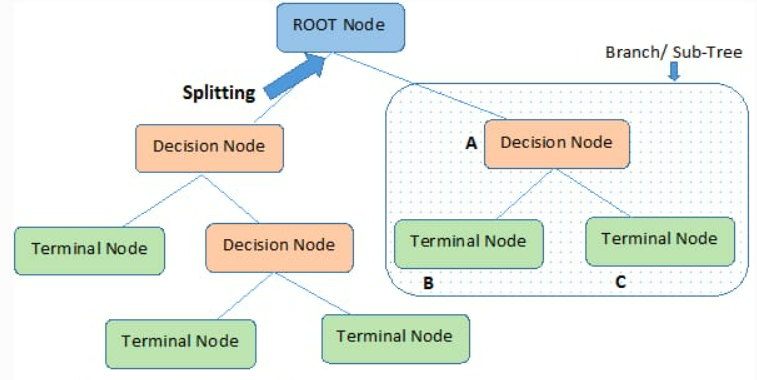

*Note: Here, A is parent node of B and C*

**Advantages:**
- Simple to understand, interpret, visualize.
- Decision trees implicitly perform variable screening or feature selection.
- Can handle both numerical and categorical data. Can also handle multi-output problems.
- Nonlinear relationships between parameters do not affect tree performance.

**DisAdvantage:**
- OverFitting Problem

In [1]:
import numpy as np
import pandas as pd

In [2]:
df3 = pd.read_csv('https://raw.githubusercontent.com/nagamounika5/Datasets/master/diabetes.csv')
df3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df3.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df3.isnull().sum().sum()

0

In [9]:
df3.shape

(768, 9)

In [8]:
X3 = df3.drop(['Outcome'],axis=1)
Y3 = df3['Outcome']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X3,Y3,
                                                 test_size=0.25,random_state=5)

**Decision Tree Classifier**

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dcl1 = DecisionTreeClassifier(criterion='gini', 
                              max_depth = 2)

In [40]:
dcl1.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2)

In [41]:
y_predict2 = dcl1.predict(X_test)
y_predict2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [43]:
confusion_matrix(Y_test, y_predict2)

array([[121,  11],
       [ 35,  25]], dtype=int64)

In [44]:
accuracy_score(Y_test, y_predict2)

0.7604166666666666

In [45]:
from sklearn import tree
import matplotlib.pyplot as plt

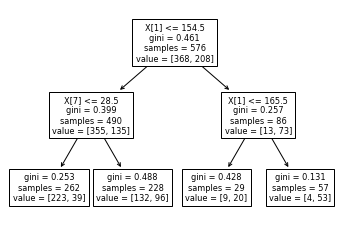

In [46]:
tree.plot_tree(dcl1)
plt.show()

In [47]:
df3.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


**Decision Tree Regressor**

In [114]:
df4 = pd.read_csv('https://raw.githubusercontent.com/LavanyaPolamarasetty/Datasets/master/Regression/automobiles.csv')
df4.head()

,make,fuel-type,num-of-doors,body-style,engine-location,length,width,height,num-of-cylinders,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,two,convertible,front,168.8,64.1,48.8,four,111,5000,21,27,13495
1,alfa-romero,gas,two,convertible,front,168.8,64.1,48.8,four,111,5000,21,27,16500
2,alfa-romero,gas,two,hatchback,front,171.2,65.5,52.4,six,154,5000,19,26,16500
3,audi,gas,four,sedan,front,176.6,66.2,54.3,four,102,5500,24,30,13950
4,audi,gas,four,sedan,front,176.6,66.4,54.3,five,115,5500,18,22,17450


In [116]:
df4.shape

(201, 14)

In [117]:
df4.columns

Index(['make', 'fuel-type', 'num-of-doors', 'body-style', 'engine-location',
       'length', 'width', 'height', 'num-of-cylinders', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [123]:
df4['engine-location'].value_counts()

front    198
rear       3
Name: engine-location, dtype: int64

In [120]:
df4['body-style'].value_counts()

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [121]:
df4['fuel-type'].value_counts()

gas       181
diesel     20
Name: fuel-type, dtype: int64

In [124]:
from sklearn.preprocessing import LabelEncoder

In [125]:
le2 = LabelEncoder()

In [126]:
df4['engine-location'] = le.fit_transform(df4['engine-location'])
df4['body-style'] = le.fit_transform(df4['body-style'])
df4['fuel-type'] = le.fit_transform(df4['fuel-type'])

In [127]:
df4.head()

,make,fuel-type,num-of-doors,body-style,engine-location,length,width,height,num-of-cylinders,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,1,two,0,0,168.8,64.1,48.8,four,111,5000,21,27,13495
1,alfa-romero,1,two,0,0,168.8,64.1,48.8,four,111,5000,21,27,16500
2,alfa-romero,1,two,2,0,171.2,65.5,52.4,six,154,5000,19,26,16500
3,audi,1,four,3,0,176.6,66.2,54.3,four,102,5500,24,30,13950
4,audi,1,four,3,0,176.6,66.4,54.3,five,115,5500,18,22,17450


In [128]:
df4.corr()

,fuel-type,body-style,engine-location,length,width,height,city-mpg,highway-mpg,price
fuel-type,1.000000,-0.147654,0.040917,-0.211187,-0.244356,-0.281578,-0.265676,-0.198690,-0.110326
body-style,-0.147654,1.000000,-0.278350,0.347571,0.155366,0.571107,0.014217,-0.021328,-0.072933
engine-location,0.040917,-0.278350,1.000000,-0.053086,-0.052205,-0.109225,-0.157132,-0.102964,0.331062
length,-0.211187,0.347571,-0.053086,1.000000,0.857170,0.492063,-0.665192,-0.698142,0.690628
width,-0.244356,0.155366,-0.052205,0.857170,1.000000,0.306002,-0.633531,-0.680635,0.751265
height,-0.281578,0.571107,-0.109225,0.492063,0.306002,1.000000,-0.049800,-0.104812,0.135486
city-mpg,-0.265676,0.014217,-0.157132,-0.665192,-0.633531,-0.049800,1.000000,0.972044,-0.686571
highway-mpg,-0.198690,-0.021328,-0.102964,-0.698142,-0.680635,-0.104812,0.972044,1.000000,-0.704692
price,-0.110326,-0.072933,0.331062,0.690628,0.751265,0.135486,-0.686571,-0.704692,1.000000


In [129]:
X4 = df4[['engine-location', 'length', 'width']]
Y4 = df4['price']

In [130]:
from sklearn.tree import DecisionTreeRegressor

In [139]:
dcr1 = DecisionTreeRegressor(criterion='friedman_mse', max_depth=3)

In [140]:
dcr1.fit(X4,Y4)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3)

In [141]:
y_pred3 = dcr1.predict(X4)

In [142]:
from sklearn.metrics import r2_score

In [143]:
r2_score(Y4, y_pred3)

0.7376077914244668

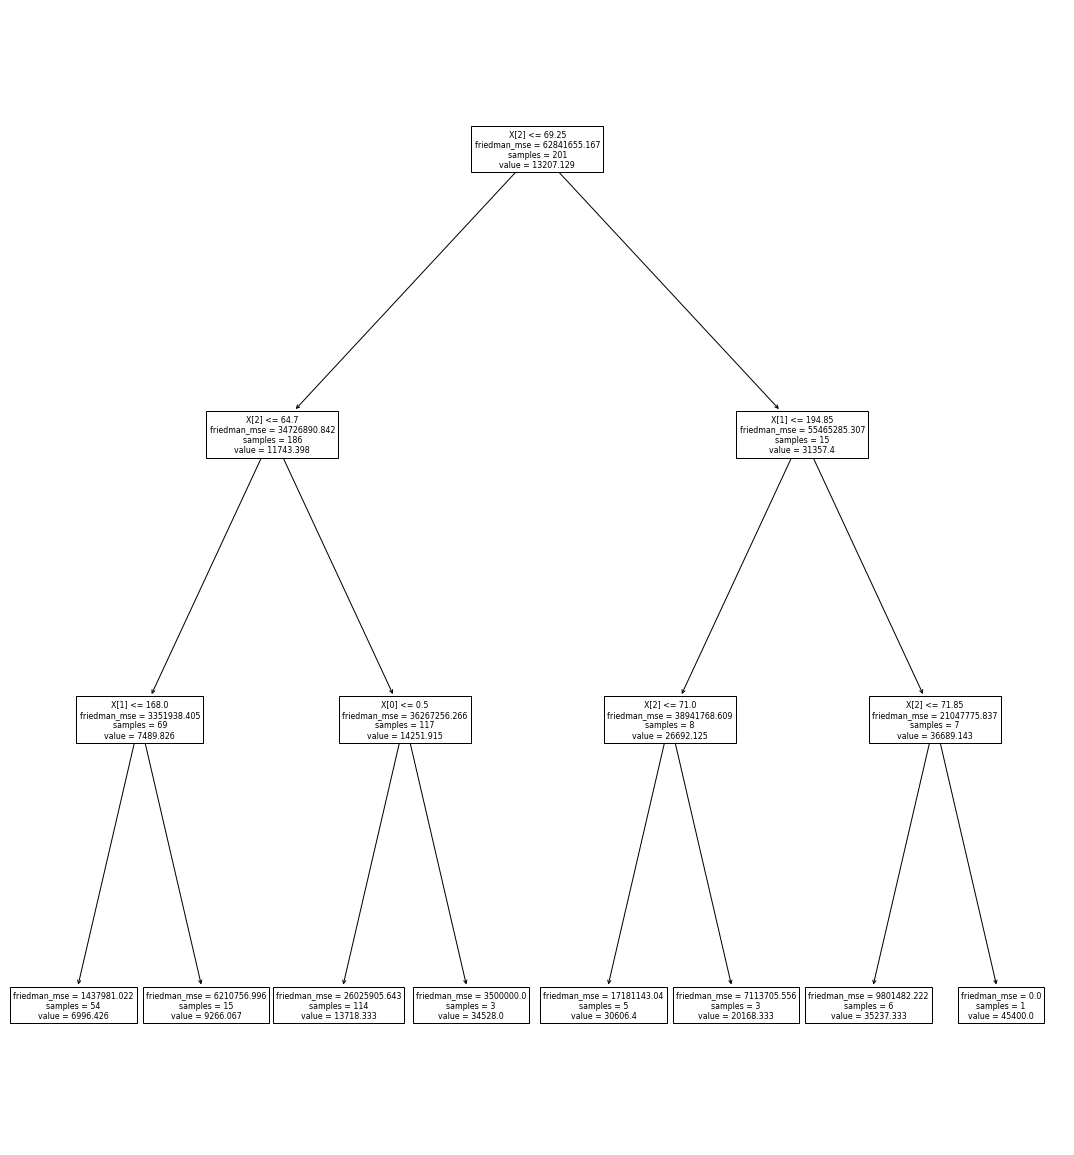

In [145]:
plt.figure(figsize=(19,21))
tree.plot_tree(dcr1)
plt.show()